In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [39]:
names = df['Item'].unique()

In [40]:
breads = pd.DataFrame(data=names,columns=["Item"])

In [41]:
num = pd.DataFrame(data = df.groupby(by='Item').count())
num.drop(labels = "Time",axis = 1,inplace=True)
num.drop(labels = "Date",axis = 1,inplace=True)

In [42]:
num_transactions = pd.merge(num,breads,on="Item")

In [43]:
ranking = num_transactions.sort_values(by="Transaction",ascending=False)

In [44]:
df["Date"] = pd.to_datetime(df["Date"])

In [45]:
df["weekday"] = df["Date"].dt.day_name()

In [46]:
temp = pd.DataFrame(df.groupby(["Transaction"]).count()["Item"])
get_unique = pd.merge(df,temp,on="Transaction")

In [47]:
get_unique.head(10)

,Date,Time,Transaction,Item_x,weekday,Item_y
0,2016-10-30,09:58:11,1,Bread,Sunday,1
1,2016-10-30,10:05:34,2,Scandinavian,Sunday,2
2,2016-10-30,10:05:34,2,Scandinavian,Sunday,2
3,2016-10-30,10:07:57,3,Hot chocolate,Sunday,3
4,2016-10-30,10:07:57,3,Jam,Sunday,3
5,2016-10-30,10:07:57,3,Cookies,Sunday,3
6,2016-10-30,10:08:41,4,Muffin,Sunday,1
7,2016-10-30,10:13:03,5,Coffee,Sunday,3
8,2016-10-30,10:13:03,5,Pastry,Sunday,3
9,2016-10-30,10:13:03,5,Bread,Sunday,3


In [48]:
by_time = get_unique.groupby(["Date","Time","Transaction"]).count().drop(labels=["weekday","Item_y"],axis=1)

In [49]:
int(by_time.index[0][1][:2])

9

In [50]:
by_time["list"] = by_time.index
by_time["hour"] = by_time["list"].apply(lambda x: int(x[1][:2]))
by_time["weekday"] = by_time["list"].apply(lambda x: x[0].day_name())

In [51]:
heat = pd.pivot_table(by_time,values="Item_x",columns="hour",index="weekday",aggfunc="count")

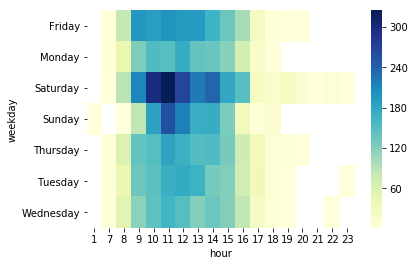

In [21]:
sns.heatmap(heat,cmap="YlGnBu")

In [22]:
all_transactions = ranking["Transaction"].sum()

In [52]:
ranking["ratio"] = ranking["Transaction"].apply(lambda x: x/all_transactions)
ranking.head(10)

,Item,Transaction,ratio
23,Coffee,5471,0.256939
11,Bread,3325,0.156155
84,Tea,1435,0.067393
15,Cake,1025,0.048138
66,Pastry,856,0.040201
62,NONE,786,0.036914
74,Sandwich,771,0.036209
55,Medialuna,616,0.028930
48,Hot chocolate,590,0.027709
26,Cookies,540,0.025360


In [24]:
coffee_buyers = df[df["Item"]=="Coffee"]["Transaction"].tolist()

In [25]:
coffee_buyers_buckets = df[df["Transaction"].isin(coffee_buyers)]

In [26]:
heat2 = pd.pivot_table(by_time,values="Item_x",columns="hour",index="weekday",aggfunc="sum")

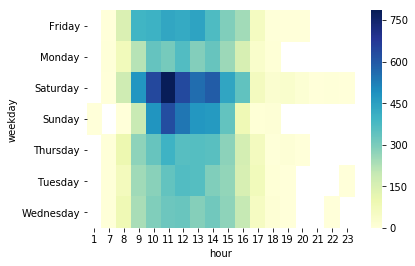

In [27]:
sns.heatmap(heat2,cmap="YlGnBu")

In [28]:
exclude_coffee = coffee_buyers_buckets[coffee_buyers_buckets["Item"]!="Coffee"]

In [29]:
exclude_coffee["hour"] = exclude_coffee["Time"].apply(lambda time: int(time[:2]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


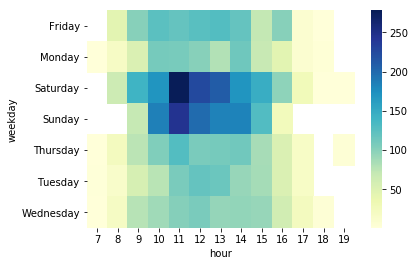

In [34]:
heat3 = pd.pivot_table(exclude_coffee,values="Transaction",columns="hour",index="weekday",aggfunc="count")
sns.heatmap(heat3,cmap="YlGnBu")

In [36]:
exclude_coffee.groupby(by="Item").count().sort_values(by="Date",ascending=False)

,Date,Time,Transaction,weekday,hour
Item,,,,,
Bread,923,923,923,923,923
Cake,540,540,540,540,540
Tea,482,482,482,482,482
Pastry,474,474,474,474,474
NONE,424,424,424,424,424
Sandwich,421,421,421,421,421
Medialuna,345,345,345,345,345
Hot chocolate,293,293,293,293,293
Cookies,283,283,283,283,283
